In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
MAX_FEATURES = 500
GOOD_MATCH_PERCENT = 0.15

In [3]:
def prepro(img):
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    mask = np.zeros((gray.shape),np.uint8)
    kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11))

    close = cv2.morphologyEx(gray,cv2.MORPH_CLOSE,kernel1)
    div = np.float32(gray)/(close)
    res = np.uint8(cv2.normalize(div,div,0,255,cv2.NORM_MINMAX))
    res2 = cv2.cvtColor(res,cv2.COLOR_GRAY2BGR)
    plt.imshow(res2)
    return res2, res, mask
    

In [4]:
m = cv2.imread("s4.jpeg")
ref = cv2.imread("blank-sudoku-grid.png")
ref_g = cv2.cvtColor(ref,cv2.COLOR_BGR2GRAY)

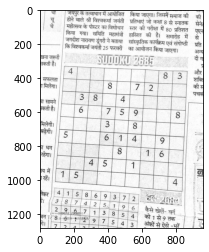

In [5]:
mo, mg, mask = prepro(m)

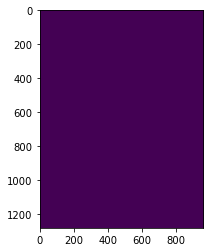

In [6]:
plt.imshow(mask)

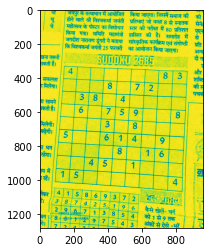

In [7]:
plt.imshow(mg)


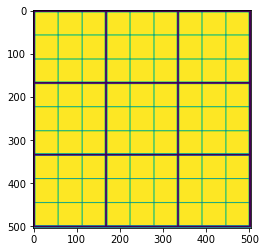

In [8]:
plt.imshow(ref_g)

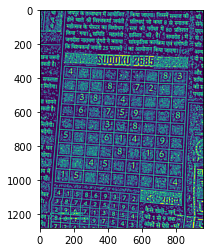

In [9]:
thresh = cv2.adaptiveThreshold(mg,255,0,1,19,2)
contour,hier = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
plt.imshow(thresh)
max_area = 0
best_cnt = None
for cnt in contour:
    area = cv2.contourArea(cnt)
    if area > 1000:
        if area > max_area:
            max_area = area
            best_cnt = cnt

t1 = cv2.drawContours(mask,[best_cnt],0,255,-1)

t2 = cv2.drawContours(mask,[best_cnt],0,0,2)


res = cv2.bitwise_and(mg,mask)

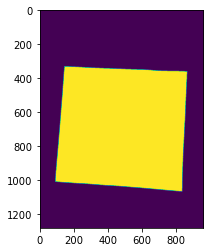

In [10]:
plt.imshow(mask)

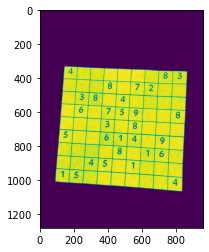

In [11]:
plt.imshow(res)

In [12]:
type(best_cnt)

numpy.ndarray

[142 328]
[141 329]
[141 333]
[140 334]
[141 335]
[141 338]
[140 339]
[140 352]
[139 353]
[139 361]
[138 362]
[137 361]
[137 362]
[138 363]
[138 375]
[137 376]
[137 389]
[136 390]
[136 405]
[135 406]
[135 415]
[134 416]
[134 432]
[133 433]
[133 443]
[132 444]
[132 454]
[131 455]
[132 456]
[132 457]
[131 458]
[131 473]
[130 474]
[130 484]
[129 485]
[129 499]
[128 500]
[128 511]
[127 512]
[127 524]
[126 525]
[126 535]
[125 536]
[125 549]
[124 550]
[124 555]
[123 556]
[123 557]
[124 558]
[124 561]
[123 562]
[123 572]
[122 573]
[122 585]
[121 586]
[121 600]
[120 601]
[120 607]
[119 608]
[118 607]
[120 609]
[120 610]
[119 611]
[119 612]
[120 613]
[120 614]
[119 615]
[119 622]
[118 623]
[118 634]
[117 635]
[117 648]
[116 649]
[116 662]
[115 663]
[116 664]
[115 665]
[114 665]
[115 666]
[115 674]
[114 675]
[113 675]
[114 676]
[114 688]
[113 689]
[113 700]
[112 701]
[112 703]
[111 704]
[112 705]
[112 710]
[111 711]
[110 711]
[111 711]
[112 712]
[111 713]
[111 718]
[110 719]
[111 720]
[111 721]


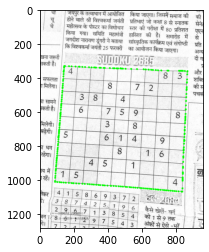

In [13]:
uwu = mo.copy()
for i in best_cnt:
    print(i[0])
    cv2.circle(uwu,(i[0][0], i[0][1]), 5, (0,255,0), -1)
    
plt.imshow(uwu)

(87, 1004)
(863, 361)
(142, 328)
(828, 1066)


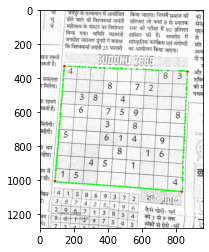

In [14]:
extLeft = tuple(best_cnt[best_cnt[:, :, 0].argmin()][0])
extRight = tuple(best_cnt[best_cnt[:, :, 0].argmax()][0])
extTop = tuple(best_cnt[best_cnt[:, :, 1].argmin()][0])
extBot = tuple(best_cnt[best_cnt[:, :, 1].argmax()][0])

ext = [extLeft,extRight,extTop,extBot]

for p in ext:
    
    print(p)
    cv2.circle(uwu,p, 7, (255,0,0), -1)
    
plt.imshow(uwu)

In [15]:
extLeft == extTop

False

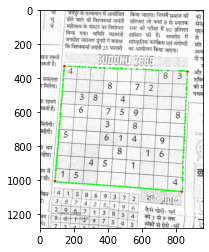

In [16]:
for k in best_cnt[best_cnt[:, :, 1] == 133]:
    print(k)
    cv2.circle(uwu,tuple(k), 7, (0,0,255), -1)
    
plt.imshow(uwu)
    
    


In [17]:
res.shape

(1280, 960)

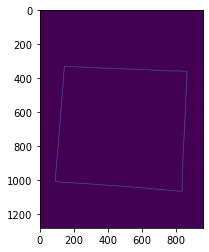

In [18]:
canny = cv2.Canny(mask, 120, 255, 1)
plt.imshow(canny)

In [19]:
corners = cv2.goodFeaturesToTrack(canny,4,0.5,50)

829.0 1062.0
91.0 1005.0
144.0 332.0
860.0 361.0


<ipython-input-20-1360510368e3>:4: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  cv2.circle(uwu2,(x,y),5,(36,255,12),-1)
<ipython-input-20-1360510368e3>:5: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  cv2.putText(uwu2,'{},{}'.format(int(x),int(y)),(x,y),2,1,(255,0,0))


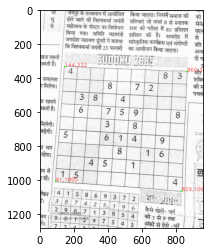

In [20]:
uwu2 = mo.copy()
for corner in corners:
    x,y = corner.ravel()
    cv2.circle(uwu2,(x,y),5,(36,255,12),-1)
    cv2.putText(uwu2,'{},{}'.format(int(x),int(y)),(x,y),2,1,(255,0,0))
    print(x,y)

plt.imshow(uwu2)

In [21]:
pA = corners[0][0]
pB = corners[1][0]
pC = corners[2][0]
pD = corners[3][0]


In [22]:
wAB = np.sqrt((pA[0]-pB[0])**2 + (pA[1]-pB[1])**2)
wDC = np.sqrt((pD[0]-pC[0])**2 + (pD[1]-pC[1])**2)
maxW = max(wAB,wDC)

hCA = np.sqrt((pC[0]-pA[0])**2 + (pC[1]-pA[1])**2)
hDB = np.sqrt((pD[0]-pB[0])**2 + (pD[1]-pB[1])**2)
maxH = max(hCA, hDB)

In [23]:
m.shape
mH = m.shape[0]
mW = m.shape[1]

In [24]:
maxW

740.1979464980972

In [25]:
def closest_node(node, nodes):
    nodes = np.asarray(nodes)
    dist_2 = (nodes - node)**2
    print(dist_2.reshape(4,2))
    n = np.sum(dist_2.astype("int"),axis=-1)

    return np.argmin(n)


In [26]:
corners

array([[[ 829., 1062.]],

       [[  91., 1005.]],

       [[ 144.,  332.]],

       [[ 860.,  361.]]], dtype=float32)

In [27]:
H


NameError: name 'H' is not defined

In [28]:
pA = corners[closest_node([0,0],corners)]
pB = corners[closest_node([0,mH-1],corners)]
pC = corners[closest_node([mW-1,mH-1],corners)]
pD = corners[closest_node([mW-1,0],corners)]

[[ 687241. 1127844.]
 [   8281. 1010025.]
 [  20736.  110224.]
 [ 739600.  130321.]]
[[687241.  47089.]
 [  8281.  75076.]
 [ 20736. 896809.]
 [739600. 842724.]]
[[ 16900.  47089.]
 [753424.  75076.]
 [664225. 896809.]
 [  9801. 842724.]]
[[  16900. 1127844.]
 [ 753424. 1010025.]
 [ 664225.  110224.]
 [   9801.  130321.]]


In [29]:
pB


array([[  91., 1005.]], dtype=float32)

In [30]:
H = W = 252

In [31]:
output_pts = np.float32([[0, 0],
                        [0, H - 1],
                        [W - 1, H - 1],
                        [W - 1, 0]])



In [32]:
input_pts = np.float32([pA, pB, pC, pD])

In [33]:
M = cv2.getPerspectiveTransform(input_pts,output_pts)

In [34]:
out = cv2.warpPerspective(mo,M,(W, H),flags=cv2.INTER_LINEAR)

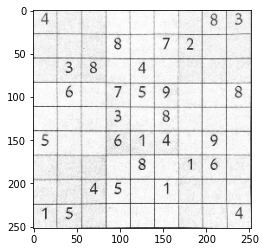

In [35]:
plt.imshow(out)